Assignment 3

Due 9/23. Do four of five.

**Number 1:**

Open the NHANES (or Ames prices or college completion datasets, if you prefer)

Find two categorical variables of interest (there are 198, and short descriptions are given in the nhanes_meta_17_18.csv file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)

Compute a contingency table for your categorical $X$ and $Y$

Discuss any interesting patterns (or lack of one) that you observe


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/Caroline/Desktop/school/understanding_uncertainty/data/nhanes_data_17_18.csv")

df[['GeneralHealthCondition','HowHealthyIsTheDiet']]

na1 = df['GeneralHealthCondition'].isna().sum()

na2 = df['HowHealthyIsTheDiet'].isna().sum()

print(f"GeneralHealthCondition has {na1} missing values and HowHealthyIsTheDiet has {na2} missing values.")

GeneralHealthCondition has 2402 missing values and HowHealthyIsTheDiet has 2540 missing values.


/var/folders/v4/nmf8gnpn5vb2t2vlt0df52mh0000gn/T/ipykernel_3132/1187896643.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/Caroline/Desktop/school/understanding_uncertainty/data/nhanes_data_17_18.csv")


In [2]:
pd.crosstab(df['GeneralHealthCondition'], df['HowHealthyIsTheDiet'], normalize='columns') 

HowHealthyIsTheDiet,Excellent,Fair,Good,Poor,Very good
GeneralHealthCondition,,,,,
Excellent,0.349876,0.037037,0.056417,0.029333,0.165399
Fair or,0.111663,0.353909,0.149506,0.445333,0.082700
Good,0.270471,0.432785,0.521392,0.304000,0.283270
Poor?,0.012407,0.039095,0.020216,0.141333,0.010456
Very good,0.255583,0.137174,0.252468,0.080000,0.458175


**Response:**

There is some correlation, but it is weak. For example, the conditional proportions between very good diet and very good health, good health and fair diet, and fair health and poor diet are all higher than other values observed. Additionally, conditional proportions between excellent diet and poor health, fair diet and excellent health, and very good diet and fair health are low. This intuitively makes sense. However, this is a bit "cherry-pick"-y and should be supplemented by a more rigorous quantitative analysis.

**Number 2:**

Open the NHANES dataset

Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the nhanes_meta_17_18.csv file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)

Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$.

Discuss any interesting patterns (or lack of one) that you observe

In [3]:
df[['GeneralHealthCondition', '60SecHr30SecHr2']]

na1 = df['GeneralHealthCondition'].isna().sum()

na2 = df['60SecHr30SecHr2'].isna().sum()

print(f"GeneralHealthCondition has {na1} missing values and 60SecHr30SecHr2 has {na2} missing values.")

# Tidy the table so no NaN values are plotted
"""
for i in range(0, len(df)):
    if df.loc[i, 'GeneralHealthCondition'].isna():
        df.loc[i, 'GeneralHealthCondition'].drop()
    if df.loc[i, '60SecHr30SecHr2'].isna():
        df.loc[i, '60SecHr30SecHr2'].drop()
"""
# Giving error AttributeError: 'float' object has no attribute 'isna' - Consulted ChatGPT, says that NaN is typically represented by a float. 
# It suggested I try the following code instead:

df2 = df.dropna(how='any',subset=['GeneralHealthCondition', '60SecHr30SecHr2'])


df2[['GeneralHealthCondition','60SecHr30SecHr2']]
 
# Looks like these values never overlap


GeneralHealthCondition has 2402 missing values and 60SecHr30SecHr2 has 7164 missing values.


,GeneralHealthCondition,60SecHr30SecHr2


In [4]:
df[['GeneralHealthCondition', 'OfTimesweekGetSchoolLunch']]

na1 = df['GeneralHealthCondition'].isna().sum()

na2 = df['OfTimesweekGetSchoolLunch'].isna().sum()

print(f"GeneralHealthCondition has {na1} missing values and OfTimesweekGetSchoolLunch has {na2} missing values.")

df3 = df.dropna(how='any',subset=['GeneralHealthCondition', 'OfTimesweekGetSchoolLunch'])


df3[['GeneralHealthCondition','OfTimesweekGetSchoolLunch']]

GeneralHealthCondition has 2402 missing values and OfTimesweekGetSchoolLunch has 6366 missing values.


,GeneralHealthCondition,OfTimesweekGetSchoolLunch
4,Good,5.000000e+00
15,Excellent,5.397605e-79
42,Good,5.000000e+00
79,Very good,5.000000e+00
85,Good,1.000000e+00
...,...,...
8331,Excellent,5.000000e+00
8341,Very good,5.000000e+00
8352,Very good,5.000000e+00
8355,Good,5.000000e+00


[Text(0.5, 1.0, 'KDE')]

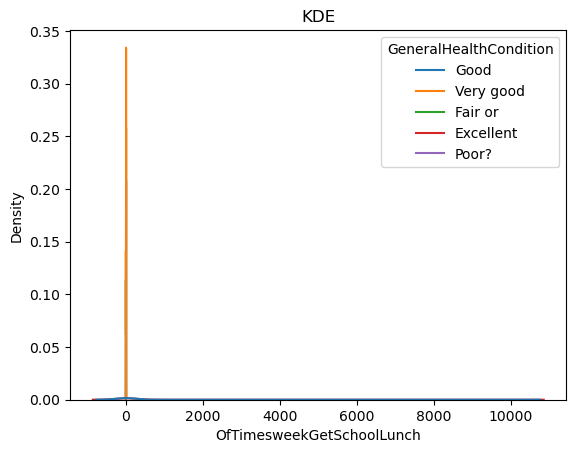

In [5]:
sns.kdeplot( data=df, x='OfTimesweekGetSchoolLunch', hue='GeneralHealthCondition', common_norm=False ).set(title='KDE')


In [6]:
# Try to replace the tiny values with 0?
# Not working: df3['OfTimesweekGetSchoolLunch'] = df3['OfTimesweekGetSchoolLunch'].replace(to_replace='5.397605e-79', value=0)

# Resort to a trusty for loop - not working
"""
for i in range(0, len(df3)):
    if df3.loc[i,'OfTimesweekGetSchoolLunch'] < 1:
        df3.loc[i,'OfTimesweekGetSchoolLunch'] = 0
"""

# Asked ChatGPT for help vectorizing - this is very cool. The 'rows' element is just the Boolean it created.
df3.loc[df3['OfTimesweekGetSchoolLunch'] < 1, 'OfTimesweekGetSchoolLunch'] = 0


# Replace huge values with 5:
df3.loc[df3['OfTimesweekGetSchoolLunch'] > 5, 'OfTimesweekGetSchoolLunch'] = 5

df3['OfTimesweekGetSchoolLunch']


4       5.0
15      0.0
42      5.0
79      5.0
85      1.0
       ... 
8331    5.0
8341    5.0
8352    5.0
8355    5.0
8364    3.0
Name: OfTimesweekGetSchoolLunch, Length: 835, dtype: float64

[Text(0.5, 1.0, 'KDE')]

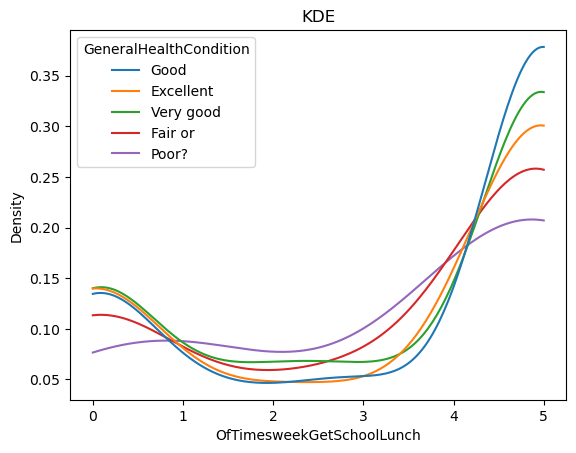

In [7]:
sns.kdeplot( data=df3, x='OfTimesweekGetSchoolLunch', hue='GeneralHealthCondition', common_norm=False, clip=(0,5)).set(title='KDE')

In [8]:
# I'm curious about simplifying the input so I can understand what's happening better.

df3.loc[df3['GeneralHealthCondition'] == 'Excellent', 'GeneralHealthCondition'] = 'Good +'
df3.loc[df3['GeneralHealthCondition'] == 'Very good', 'GeneralHealthCondition'] = 'Good +'
df3.loc[df3['GeneralHealthCondition'] == 'Good', 'GeneralHealthCondition'] = 'Good +'

df3.loc[df3['GeneralHealthCondition'] == 'Fair or', 'GeneralHealthCondition'] = 'Fair -'
df3.loc[df3['GeneralHealthCondition'] == 'Poor?', 'GeneralHealthCondition'] = 'Fair -'

[Text(0.5, 1.0, 'KDE')]

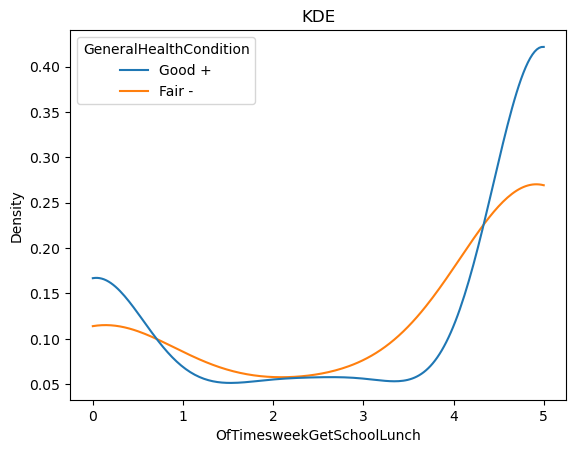

In [9]:
sns.kdeplot( data=df3, x='OfTimesweekGetSchoolLunch', hue='GeneralHealthCondition', common_norm=False, clip=(0,5)).set(title='KDE')

**Response:**

Ok time to find some patterns! The highest density of students in either category get lunch 5 times a week, followed by 4, then, interestingly, 0. Fewer students get lunch 1-3 times a week. I wonder if this is a function of the plans available - maybe 4+ meals is a plan, while 1-3 is a less common plan or isn't offered in some schools? So, for students who get lunch from the school, they get it on the 4+ plan or not at all. Or maybe parents are unlikely to pack lunches only some days - they either pack lunch for their kids every day or not at all (with the occasional meal once during the week). I'm honestly pretty confused and would like to, if taking this deeper, investigate school lunch policies and how the question was asked.

Also, students who have a general health condition of fair or poor tend to be seen at higher densities in that middle range as compared to the good+ students. I wonder if this is because the fair- households may be more irregular in terms of approach to health, so lunch from the school is only bought/can only be afforded a few times a week, whereas good+ childrens' households may be more stable (potentially due to access to resources such as money and time) and either pack lunch everyday or buy lunch everyday. This could be me being biased and stereotyping, though - I am seeking an answer and not hoping to judge the families of children with poor health :(

SHOOT I think OfTimesweekGetSchoolLunch is a categorical!!! Leaving it because I think it and my thought process were interesting.

In [26]:
# Try something else: Cigarettes smoked per day

cig = df[['GeneralHealthCondition', 'CigarettesSmokedPerDay']]
cig

# Drop NaN values
cig2 = cig.dropna(how='any',subset=['GeneralHealthCondition', 'CigarettesSmokedPerDay'])
cig2



,GeneralHealthCondition,CigarettesSmokedPerDay
8,Good,2.0
9,Very good,15.0
11,Fair or,25.0
13,Very good,20.0
25,Fair or,3.0
...,...,...
8334,Excellent,10.0
8337,Good,11.0
8346,Fair or,6.0
8359,Excellent,20.0


[Text(0.5, 1.0, 'KDE')]

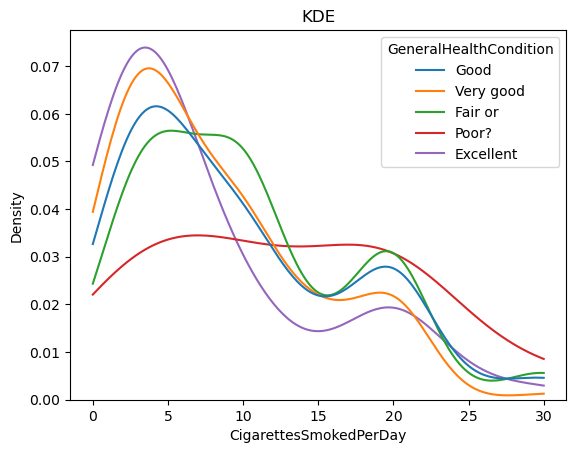

In [5]:
sns.kdeplot( data=cig2, x='CigarettesSmokedPerDay', hue='GeneralHealthCondition', common_norm=False, clip=(0,30) ).set(title='KDE')

**Response:**

This one is much more clear. People mostly tend to smoke 0-10 cigarettes per day in ANY health category, with TWO exceptions: People with fair health has the highest density from about 5-15, while people with poor health have the highest density from about 5-20. This seems to show that as general health decreases, the highest density of cigarettes smoked increases.


Another way of saying this is that the highest density of excellent is located slightly to the left of the other health conditions, while very good is only slightly to the right of it and good is only slightly to the right of very good. This also means that the highest density of cigrarettes smoked decreases as health increases.

In [27]:
# Make a crosstab
pd.crosstab(cig2['GeneralHealthCondition'], cig2['CigarettesSmokedPerDay'], normalize='columns')


CigarettesSmokedPerDay,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,17.0,18.0,19.0,20.0,25.0,30.0,34.0,35.0,40.0,95.0
GeneralHealthCondition,,,,,,,,,,,,,,,,,,,,,
Excellent,0.111111,0.075758,0.105263,0.119403,0.064103,0.044444,0.028571,0.064516,0.0,0.041379,...,0.000000,0.00,0.0,0.053691,0.111111,0.041667,0.0,0.0,0.000000,0.0
Fair or,0.180556,0.212121,0.263158,0.223881,0.294872,0.244444,0.342857,0.290323,0.4,0.365517,...,0.428571,0.75,1.0,0.295302,0.222222,0.375000,0.0,0.0,0.285714,0.0
Good,0.416667,0.484848,0.407895,0.447761,0.410256,0.511111,0.457143,0.419355,0.4,0.386207,...,0.428571,0.25,0.0,0.442953,0.555556,0.458333,0.0,1.0,0.285714,1.0
Poor?,0.027778,0.045455,0.039474,0.014925,0.012821,0.044444,0.028571,0.032258,0.0,0.034483,...,0.000000,0.00,0.0,0.073826,0.111111,0.083333,0.0,0.0,0.285714,0.0
Very good,0.263889,0.181818,0.184211,0.194030,0.217949,0.155556,0.142857,0.193548,0.2,0.172414,...,0.142857,0.00,0.0,0.134228,0.000000,0.041667,1.0,0.0,0.142857,0.0


In [28]:
# Put numeric data into buckets for easier visualization
bins = [0, 10, 20, 30]
cig2['CigarettesSmokedPerDay'] = pd.cut(cig2.CigarettesSmokedPerDay, bins=bins)
pd.crosstab(cig2['GeneralHealthCondition'], cig2['CigarettesSmokedPerDay'], normalize='columns')


/var/folders/v4/nmf8gnpn5vb2t2vlt0df52mh0000gn/T/ipykernel_3132/593750073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cig2['CigarettesSmokedPerDay'] = pd.cut(cig2.CigarettesSmokedPerDay, bins=bins)


CigarettesSmokedPerDay,"(0, 10]","(10, 20]","(20, 30]"
GeneralHealthCondition,,,
Excellent,0.072581,0.039683,0.060606
Fair or,0.277419,0.309524,0.333333
Good,0.427419,0.436508,0.484848
Poor?,0.030645,0.063492,0.090909
Very good,0.191935,0.150794,0.030303


In the poor, fair, and good categories, the crosstab value increases as the number of cigarettes increases. However, in the very good category, the crosstab value decreases as the number of cigarettes increases. This seems to indicate a relationship where the number of cigarettes smoked per day decreases as health increases. Interestingly, in the Excellent column, the crosstab value goes back up again at 20+ cigarettes. I am not sure why this is. Maybe it's Europe coming in with their excellent health and prolific smoking habits? Ha ha.

By the way, crosstab value means the percent of people in one category that also fall in another. So a crosstab value of 0.072581 for the categories Excellent and (0,10] means that about 7% of people who smoke 10 or fewer cigarettes a day have excellent health / 7% of people who have excellent health smoke 10 or fewer cigarettes a day.

**Number 3:**

We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error (equation in Prof. Johnson's GitHub).
    
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator."


**Response:**

A pictoral depiction is here (universal access has been granted): https://docs.google.com/presentation/d/11N-V1IaiHkJNCpjOhgU0x2avu5MphGlQeVIrygBWla4/edit?usp=sharing

**Number 4:**

Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
 
 From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [13]:
na1 = df['TotalSugarsGm_DR1TOT'].isna().sum()

na2 = df['TotalSaturatedFattyAcidsGm_DR1TOT'].isna().sum()

print(f"TotalSugarsGm_DR1TOT has {na1} missing values and TotalSaturatedFattyAcidsGm_DR1TOT has {na2} missing values.")

TotalSugarsGm_DR1TOT has 1081 missing values and TotalSaturatedFattyAcidsGm_DR1TOT has 1081 missing values.


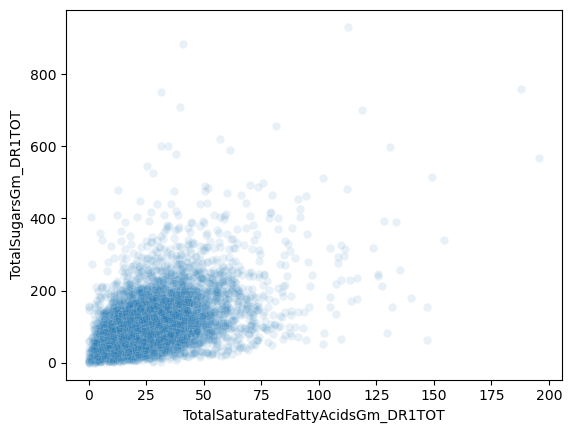

In [ ]:
# Choose 2 numeric variables
df_sug_fat = df.loc[:,['TotalSugarsGm_DR1TOT', 'TotalSaturatedFattyAcidsGm_DR1TOT']]

# Drop missing values
df_sug_fat = df_sug_fat.dropna() 

# Reset the row index
df_sug_fat = df_sug_fat.reset_index() 

# Define x and y
y = df_sug_fat['TotalSugarsGm_DR1TOT']
x = df_sug_fat['TotalSaturatedFattyAcidsGm_DR1TOT']

# Scatterplot
sns.scatterplot(y=y,x=x,alpha = .1)
plt.show()

## Create a grid from the x values
grid = np.sort(x.unique())

## Bandwidth:
silverman = 1.06 * np.std(x) * len(x)**(-0.2)

## Guassian kernel function
def kernel(u):
    k = np.exp( -(x-z)**2/(2*u**2) )/( np.sqrt(2*np.pi) * u)
    return k

# LCLS Regression:
cef = [] # Save values for the CEF
for z in grid: # For each grid value
    num = 0 # Start with the numerator sum = 0
    den = 0 # Start with the denominator sum = 0
    for i, data in enumerate(x): # For each data point
        k_data = kernel( (z-data)/ silverman )/(len(x)* silverman) # Compute kernel weight
        den += k_data # Add to denominator - why do we add k_data and not 1?
        num += y[i] * k_data # Multiple by y value, add to numerator
    y_hat_z = num/den # Compute y_hat(z)
    cef.append(y_hat_z) # Add to the CEF


sns.scatterplot(y=y,x=x,alpha = .1)
sns.lineplot(x=grid,y=cef,color='orange')
plt.show()

In [30]:
""" Estimate the value of y hat z - ie the predicted value of z at y"""

# Choose 2 numeric variables
df_sug_fat = df.loc[:,['TotalSugarsGm_DR1TOT', 'TotalSaturatedFattyAcidsGm_DR1TOT']]

# Drop missing values
df_sug_fat = df_sug_fat.dropna() 

# Reset the row index
df_sug_fat = df_sug_fat.reset_index() 

# Define x and y
y = df_sug_fat['TotalSugarsGm_DR1TOT']
x = df_sug_fat['TotalSaturatedFattyAcidsGm_DR1TOT']


class Estimator():
    """Building a class to implement the Naradaya-Watson estimator"""  

    def __init__(self, x):
        # Initializing variables
        self.x = x.to_numpy().reshape(-1,1)# Data of interest (numeric variable) reshaped
        N = len(x) 
        z = np.sort(x.unique()).reshape(1,-1) # Our grid
        silverman = 1.06 * np.sqrt(np.var(x)) * N**(-.2) # Silverman plug-in estimate to be used as the bandwidth (commonly called h)
        kernel = np.exp( -(x-z)**2/(2*silverman**2) )/( np.sqrt(2*np.pi) * silverman) # Using Gaussian kernel

    def __str__(self):
        return f"x = {self.x}" 
    
estimator = Estimator(df_sug_fat['TotalSugarsGm_DR1TOT'])

print(estimator)

ValueError: operands could not be broadcast together with shapes (7285,) (1,6560) 


**Number 5:**

In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area).


Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be \"conceptual\" rather than \"practical\"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.


Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome
   

<Axes: xlabel='TotalSugarsGm_DR1TOT', ylabel='TotalSaturatedFattyAcidsGm_DR1TOT'>

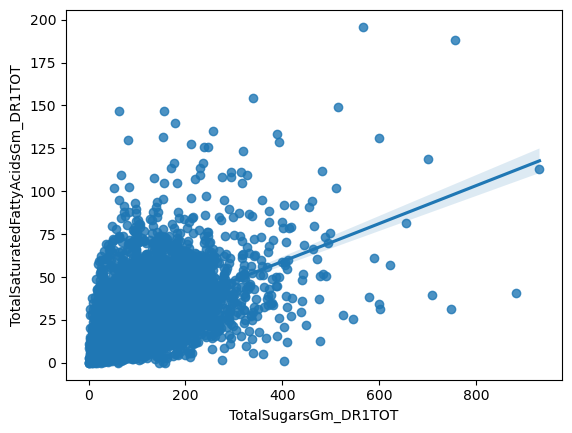

In [ ]:
# Scatterplot
sns.regplot(x=df['TotalSugarsGm_DR1TOT'], y=df['TotalSaturatedFattyAcidsGm_DR1TOT'], data = df)

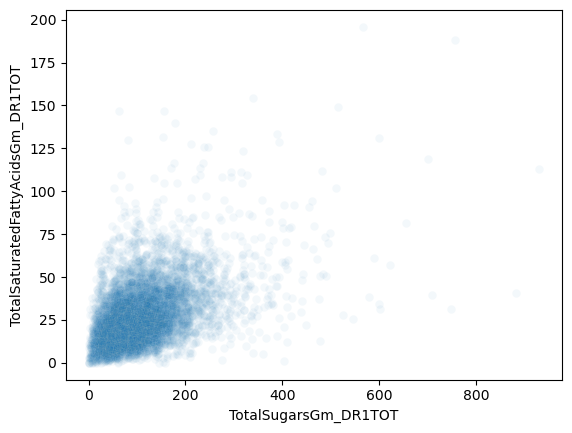

[4.86625752 4.98398956 5.06247758 ... 0.03924401 0.03924401 0.        ]


In [ ]:
# CEF
import matplotlib.pyplot as plt 

h = 1.06 * np.sqrt(np.var(x)) * len(x) **(-.2)

def nbhd_mean(x,y,h):
    ''' Computes local constant least squares regression estimates with uniform kernel. '''
    n = len(x) # Number of observations
    grid = np.sort(x.unique()) # Extract and sort unique values for x
    I = np.abs( x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) ) <= h # Compute the kernel
    numerator = y@I/(2*h) # Compute the numerator
    denominator = np.sum(I,axis=0)/(2*h) # Compute denominator
    y_hat = numerator/denominator # Compute estimator
    sns.scatterplot(data=df, y=y, x=x,alpha=.05)
    sns.lineplot(x=grid,y=y_hat, marker='o', color='orange')
    plt.show()

    return y_hat, grid

y_hat, grid = nbhd_mean(x,y,h=h)

**Response**:

Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be \"conceptual\" rather than \"practical\"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.

- I think this is a plausibly causal relationship - sugary food often has a lot of saturated fat, so when people eat a lot of sugary food, they also likely eat a lot of saturated fat. Because the cause of both variables is type and amount of food eaten, and since sugar and fat are inextricably linked, especially in the American food system, this is a plausibly causal relationship. Also, eating a lot of sugar may cause (biological) fatty food cravings (wanting chips after a big bag of gummy worms). One threat or missing variable on how sugars affect fats is what country one lives in. According to https://www.sciencedirect.com/science/article/pii/S0022316622156920, "[p]eople in higher income nations consume more added sugars and fats than do people in lower income nations," so sugar may not be causing fat consumption as much as your country's income is causing both.

Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome.

- Even if your country of residence impacts both sugar and fat consumption, it does so in a reliable and stable way, so if you don't intervene in the system to control the outcome, sugar and fat consumption are both linked to each other. The prediction will still work, even if it is not causal.